In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r'C:\Users\rishab\Desktop\projects\covid 19\Corona.csv')
df_india =df.copy()
df

,S.No,Name of State / UT,Total Case,Cured,Death
0,1,Andhra Pradesh,161,1,1
1,2,Andaman and Nicobar Islands,10,0,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,24,0,0
4,5,Bihar,29,0,1
5,6,Chandigarh,18,0,0
6,7,Chhattisgarh,9,3,0
7,8,Delhi,503,16,7
8,9,Goa,6,0,0
9,10,Gujarat,95,10,9


In [4]:
India_coord=pd.read_excel(r'C:\Users\rishab\Desktop\projects\covid 19\Indian Coordinates.xlsx')

dbd_India=pd.read_excel(r'C:\Users\rishab\Desktop\projects\covid 19\per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel(r'C:\Users\rishab\Desktop\projects\covid 19\per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Korea=pd.read_excel(r'C:\Users\rishab\Desktop\projects\covid 19\per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Wuhan=pd.read_excel(r'C:\Users\rishab\Desktop\projects\covid 19\per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')



In [5]:
df.drop(['S.No'],axis=1,inplace=True)
total_cases=df['Total Case'].sum()
print('Total no of confirmed cases in India till 4th april',total_cases)

Total no of confirmed cases in India till 4th april 3315


In [6]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Case,Cured,Death
0,Andhra Pradesh,161,1,1
1,Andaman and Nicobar Islands,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,24,0,0
4,Bihar,29,0,1
5,Chandigarh,18,0,0
6,Chhattisgarh,9,3,0
7,Delhi,503,16,7
8,Goa,6,0,0
9,Gujarat,95,10,9


In [7]:
df['Total Active']=df['Total Case']-(df['Death']+df['Cured'])
total_active=df['Total Active'].sum()
print('Total no of active cases in india',total_active)
Tot_Cases=df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total no of active cases in india 3018


,Total Active
Name of State / UT,
Maharashtra,647
Delhi,480
Tamil Nadu,404
Kerala,252
Rajasthan,176
Andhra Pradesh,159
Uttar Pradesh,153
Telengana,150
Karnataka,113


In [8]:
df_full=pd.merge(India_coord,df,on='Name of State / UT')


In [9]:
df_full


,Name of State / UT,Latitude,Longitude,Total Case,Cured,Death,Total Active
0,Andhra Pradesh,14.750429,78.570026,161,1,1,159
1,Delhi,28.669993,77.230004,503,16,7,480
2,Haryana,28.450006,77.019991,49,24,0,25
3,Karnataka,12.570381,76.919997,128,12,3,113
4,Kerala,8.900373,76.569993,295,41,2,252
5,Maharashtra,19.250232,73.160175,748,56,45,647
6,Punjab,31.519974,75.980003,53,1,5,47
7,Rajasthan,26.449999,74.639981,179,3,0,176
8,Telengana,18.112400,79.019300,158,1,7,150
9,Tamil Nadu,12.920386,79.150042,411,6,1,404


In [10]:
map=folium.Map(location =[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value,name in zip (df_full['Latitude'],df_full['Longitude'],df_full['Total Case'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radium=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Case</strong> :'+str(value)+'<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
map

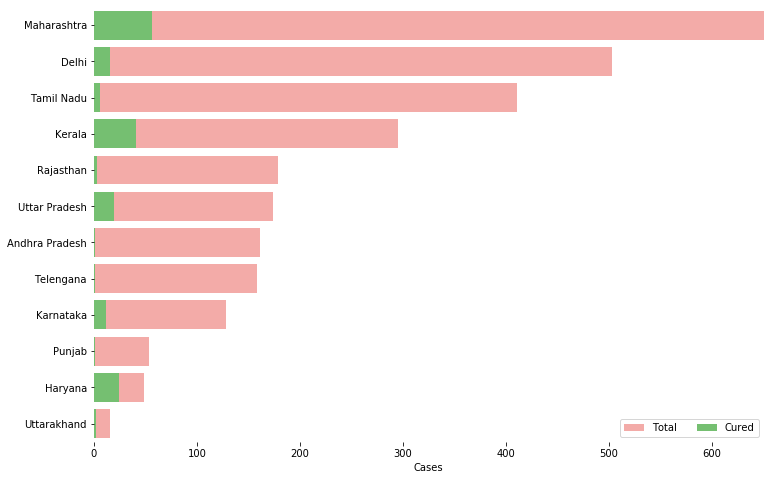

In [11]:
f , ax=plt.subplots(figsize=(12, 8))
data=df_full[['Name of State / UT','Total Case','Cured','Death']]
data.sort_values('Total Case',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Case",y="Name of State / UT",data=data,label="Total",color="r")


sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="Cured",color="g")

ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(xlim=(0,650),ylabel="",xlabel="Cases")
sns.despine(left=True,bottom=True)

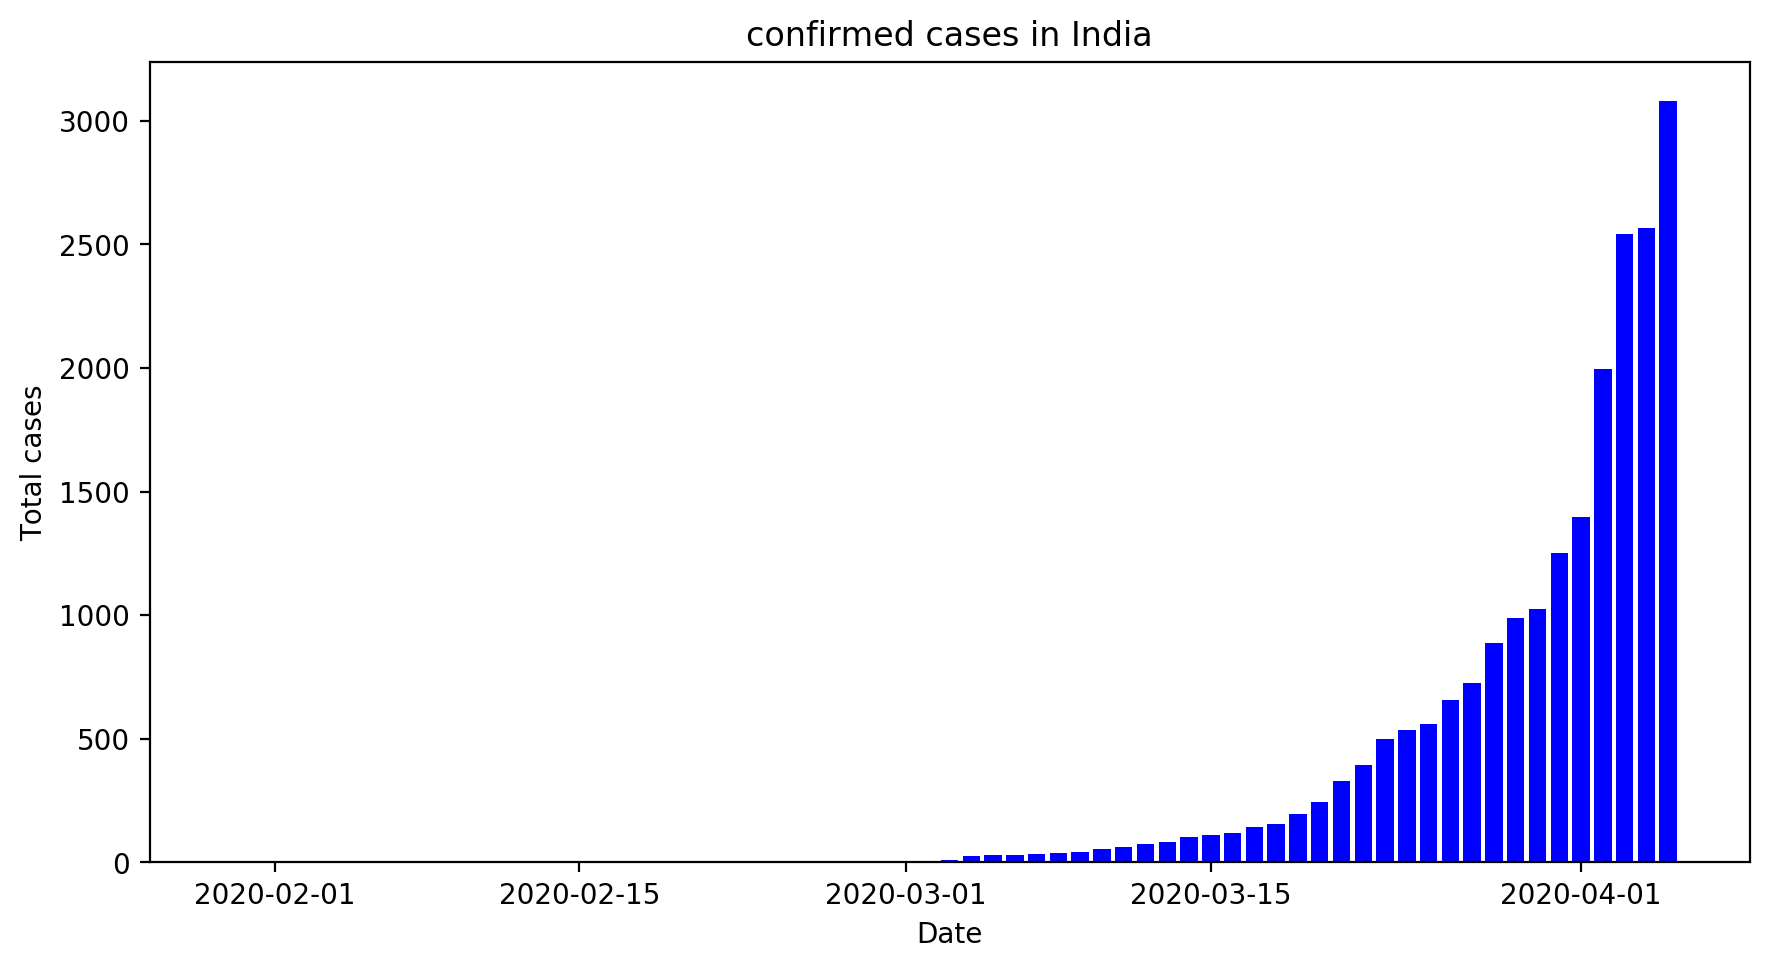

In [12]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total cases")
axes.set_title("confirmed cases in India")
plt.show()

fig=px.bar(dbd_India,x='Date',y='Total Cases',color='Total Cases',title="confirmed cases in India")
fig.show()

## cumulataive case of India Italy Wuhan Korea##

In [13]:
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases', orientation='v',height=600,title='Confirmed cases in India',
          color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases', orientation='v',height=600,title='Confirmed cases in Italy',
          color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases', orientation='v',height=600,title='Confirmed cases in Korea',
          color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()


fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases', orientation='v',height=600,title='Confirmed cases in Wuhan',
          color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

## comparision between the rise of cases in wuhan,India,Italy,Korea ##

In [14]:
from plotly.subplots import make_subplots

fig=make_subplots(rows=2,cols=2,specs=[[{},{}],
                                      [{"colspan": 2},None]],
                                subplot_titles=("korea","Italy","India","wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total confirmed cases(cumulative)")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [15]:
title='Main source for news'
labels=['Korea','Italy','India']
colors=['rgb(122,128,0)','rgb(255,0,0)','rgb(49,130,189)']

mode_size =[10,10,12]
line_size=[1,1,8]

fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],
                        y=dbd_Korea['Total Cases'],mode='lines',
                        name=labels[0],
                        line=dict(color=colors[0],width=line_size[0]),
                        connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],
                        y=dbd_Italy['Total Cases'],mode='lines',
                        name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                        connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],
                        y=dbd_India['Total Cases'],mode='lines',
                        name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),
                        connectgaps=True))

annotations= []

annotations.append(dict(xref='paper',yref='paper',x=0.5,y=-0.1,
                       xanchor='center',yanchor='top',
                       text='Days after crossing 100 cases',
                       font=dict(family='Arial',
                                 size=12,
                                 color='rgb(150,150,150)'),
                       showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.show()

In [16]:
df=pd.read_csv(r'C:\Users\rishab\Desktop\projects\covid 19\covid_19_clean_complete.csv')
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

df_confirmed=pd.read_csv(r'C:\Users\rishab\Desktop\projects\covid 19\time_series_covid19_confirmed_global.csv')
df_recoverd=pd.read_csv(r'C:\Users\rishab\Desktop\projects\covid 19\time_series_covid19_deaths_global.csv')
df_deaths=pd.read_csv(r'C:\Users\rishab\Desktop\projects\covid 19\time_series_covid19_recovered_global.csv')


df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recoverd.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)

In [17]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2


In [18]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [19]:
df2=df.groupby(["Date","Country","Province/State"])[['Date', 'Province/State', 'Country' ,'Confirmed', 'Deaths','Recovered']]
df2.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,1/22/20,NaN,Afghanistan,0,0,0
1,1/22/20,NaN,Albania,0,0,0
2,1/22/20,NaN,Algeria,0,0,0
3,1/22/20,NaN,Andorra,0,0,0
4,1/22/20,NaN,Angola,0,0,0
...,...,...,...,...,...,...
19006,4/4/20,Yukon,Canada,6,0,0
19009,4/4/20,Anguilla,United Kingdom,3,0,0
19010,4/4/20,British Virgin Islands,United Kingdom,3,0,0
19011,4/4/20,Turks and Caicos Islands,United Kingdom,5,0,0


In [20]:
df.query('Country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
69,3/9/20,43,0,3
70,4/1/20,1998,58,148
71,4/2/20,2543,72,191
72,4/3/20,2567,72,192


In [21]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
1/22/20,5521.87883,5903.438992,555,17,28
1/23/20,5521.87883,5903.438992,654,18,30
1/24/20,5521.87883,5903.438992,941,26,36
1/25/20,5521.87883,5903.438992,1434,42,39
1/26/20,5521.87883,5903.438992,2118,56,52


In [22]:
confirmed= df.groupby('Date').sum()['Confirmed'].reset_index()
deaths= df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [23]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

fig.update_layout(title='Worldwide NCOVID-19 cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [33]:
from fbprophet import Prophet

In [34]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [69]:
confirmed.columns=['ds','y']
#confirmed['ds'] =pd.to_datatime(confirmed['ds'])

In [47]:
confirmed.tail()

,ds,y
69,3/9/20,113590
70,4/1/20,932605
71,4/2/20,1013155
72,4/3/20,1095915
73,4/4/20,1197403


In [37]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\rishab\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
76,2020-04-07
77,2020-04-08
78,2020-04-09
79,2020-04-10
80,2020-04-11


In [38]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2020-04-07,1.277908e+06,1.236441e+06,1.317433e+06
77,2020-04-08,1.339143e+06,1.296305e+06,1.377772e+06
78,2020-04-09,1.401757e+06,1.358126e+06,1.445568e+06
79,2020-04-10,1.465694e+06,1.414739e+06,1.515113e+06
80,2020-04-11,1.526608e+06,1.466093e+06,1.579990e+06


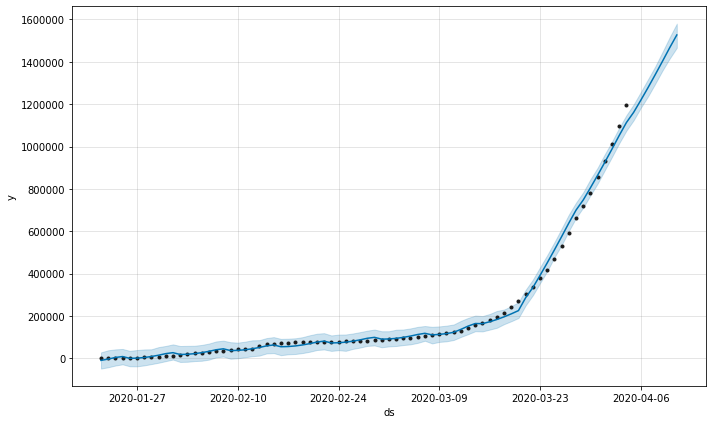

In [39]:
confirmed_forecast_plot=m.plot(forecast)

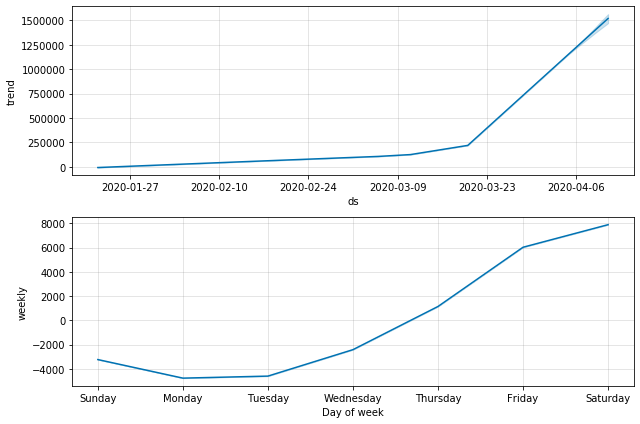

In [40]:
confirmed_forecast_plot=m.plot_components(forecast)

In [41]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [42]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\rishab\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
76,2020-04-07
77,2020-04-08
78,2020-04-09
79,2020-04-10
80,2020-04-11


In [43]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2020-04-07,65780.147031,62746.151843,68896.840543
77,2020-04-08,69185.719866,66074.533105,72578.364987
78,2020-04-09,72678.511298,69019.220497,75983.220791
79,2020-04-10,76242.393628,72473.842990,79997.534935
80,2020-04-11,79584.383564,75525.565265,83659.210435


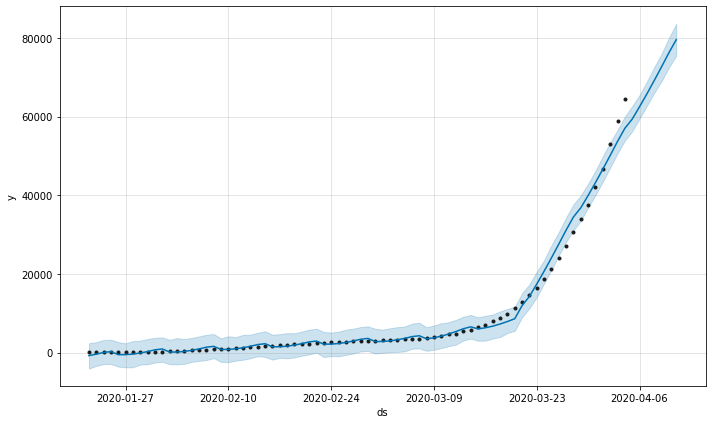

In [44]:
deaths_forecast_plot=m.plot(forecast)

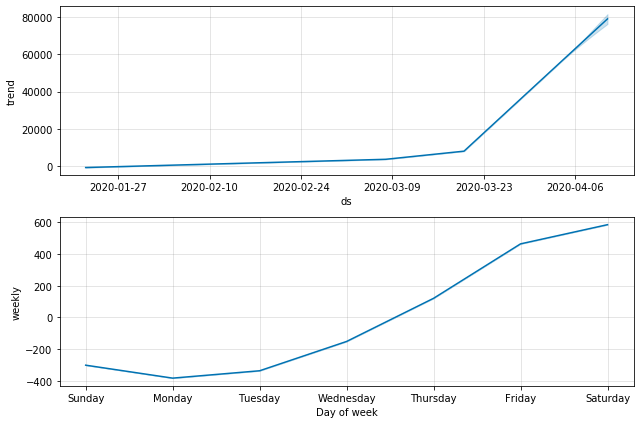

In [45]:
deaths_forecast_plot=m.plot_components(forecast)